In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Exploratory Data Analysis of Airbnb user bookings 

### Overview

We would be analyzing the Airbnb users dataset to understand the patterns of their destination country bookings using Exploratory Data Analysis. The dataset can be downloaded from [here.]('https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data')

### About the Dataset

The dataset has 213451 rows and consists of following columns:<br>
1. id: user id
2. date_account_created: the date of account creation
3. timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
4. date_first_booking: date of first booking
5. gender
6. age
7. signup_method
8. signup_flow: the page a user came to signup up from
9. language: international language preference
10. affiliate_channel: what kind of paid marketing
11. affiliate_provider: where the marketing is e.g. google, craigslist, other
12. first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
13. signup_app
14. first_device_type
15. first_browser
16. country_destination: this is the target variable you are to predict

Note: There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

### Imported the required libraries

In [165]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Loaded the dataset and checked the number of rows in the dataset

In [166]:
df=pd.read_csv("Datasets/train_users_2.csv")
print(str('There are total '+ str(df.shape[0])+' rows in training dataset.'))
df.head()

There are total 213451 rows in training dataset.


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### Now we'll start the cleaning process:
#### Step 1: Check for Nulls

In [167]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

We can see that age, date_first_booking and first_affliate tracked has NULL values.

#### Step 2: Check for NULL values which are in some other format

In some cases, instead of NaN, the missing values are in the form of some other format like '-unknown-'. This can be identified by looking for unique values in each of the column as shown below:

a. Affiliate Channel:

In [168]:
df.affiliate_channel.unique()

array(['direct', 'seo', 'other', 'sem-non-brand', 'content', 'sem-brand',
       'remarketing', 'api'], dtype=object)

b. Affiliate Provider:

In [169]:
df.affiliate_provider.unique()

array(['direct', 'google', 'other', 'craigslist', 'facebook', 'vast',
       'bing', 'meetup', 'facebook-open-graph', 'email-marketing',
       'yahoo', 'padmapper', 'gsp', 'wayn', 'naver', 'baidu', 'yandex',
       'daum'], dtype=object)

c. Age:

In [170]:
df.age.unique()

array([      nan, 3.800e+01, 5.600e+01, 4.200e+01, 4.100e+01, 4.600e+01,
       4.700e+01, 5.000e+01, 3.600e+01, 3.700e+01, 3.300e+01, 3.100e+01,
       2.900e+01, 3.000e+01, 4.000e+01, 2.600e+01, 3.200e+01, 3.500e+01,
       5.900e+01, 4.900e+01, 4.400e+01, 3.400e+01, 2.800e+01, 1.900e+01,
       5.300e+01, 5.200e+01, 3.900e+01, 5.700e+01, 2.500e+01, 5.400e+01,
       6.900e+01, 6.300e+01, 4.300e+01, 5.500e+01, 6.500e+01, 5.800e+01,
       6.100e+01, 1.800e+01, 5.000e+00, 2.700e+01, 4.500e+01, 6.000e+01,
       4.800e+01, 5.100e+01, 6.400e+01, 7.200e+01, 7.000e+01, 6.700e+01,
       7.300e+01, 2.014e+03, 1.040e+02, 6.600e+01, 1.050e+02, 6.800e+01,
       9.500e+01, 2.400e+01, 9.400e+01, 7.500e+01, 7.900e+01, 6.200e+01,
       2.013e+03, 1.600e+01, 4.000e+00, 2.300e+01, 1.010e+02, 9.800e+01,
       7.600e+01, 7.400e+01, 8.700e+01, 9.200e+01, 1.150e+02, 7.100e+01,
       8.400e+01, 1.070e+02, 7.800e+01, 9.900e+01, 1.100e+02, 1.020e+02,
       8.200e+01, 7.700e+01, 2.200e+01, 8.900e+01, 

d. Country destination:

In [171]:
df.country_destination.unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

e. Date Account Created:

In [172]:
df.date_account_created.unique()

array(['2010-06-28', '2011-05-25', '2010-09-28', ..., '2014-06-27',
       '2014-06-29', '2014-06-30'], dtype=object)

f. Date First Booking:

In [173]:
df.date_first_booking.unique()

array([nan, '2010-08-02', '2012-09-08', ..., '2015-06-25', '2015-06-29',
       '2015-06-28'], dtype=object)

g. First Affiliate Tracked 

In [174]:
df.first_affiliate_tracked.unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

h. First Browser

In [175]:
df.first_browser.unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
       'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
       'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
       'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
       'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
       'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
       'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
       'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon'],
      dtype=object)

###### Here, in browsers list, we can see a value as '-unknown-'.

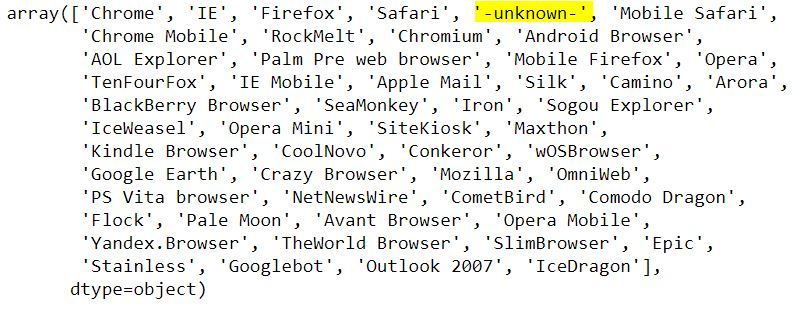

In [176]:
from IPython.display import Image
Image(filename="img/Browser.jpg", width=550, height=350)

i. First Device Type

In [177]:
df.first_device_type.unique()

array(['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown',
       'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone',
       'SmartPhone (Other)'], dtype=object)

j. Gender

In [178]:
df.gender.unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

###### Similarly for Gender.

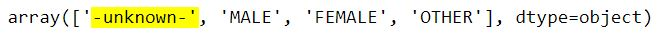

In [179]:
Image(filename="img/Gender.jpg", width=450, height=300)

k. Id

In [180]:
df.id.unique()

array(['gxn3p5htnn', '820tgsjxq7', '4ft3gnwmtx', ..., '6o3arsjbb4',
       'jh95kwisub', 'nw9fwlyb5f'], dtype=object)

l. Language

In [181]:
df.language.unique()

array(['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

m. Signup App

In [182]:
df.signup_app.unique()

array(['Web', 'Moweb', 'iOS', 'Android'], dtype=object)

n. Signup Flow

In [183]:
df.signup_flow.unique()

array([ 0,  3,  2,  1, 24,  8,  6,  5, 10, 25, 12,  4, 16, 15, 20, 21, 23],
      dtype=int64)

o. Signup Method

In [184]:
df.signup_method.unique()

array(['facebook', 'basic', 'google'], dtype=object)

p. Timestamp First Active

In [185]:
df.timestamp_first_active.unique()

array([20090319043255, 20090523174809, 20090609231247, ...,
       20140630235754, 20140630235822, 20140630235824], dtype=int64)

Now we will replace the '-unknown-' values with NaN.

In [186]:
df.first_browser.replace('-unknown-', np.nan, inplace=True)
df.gender.replace('-unknown-', np.nan, inplace=True)

Overview of the data:

In [187]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


#### Step:3 Check for anomalies in numerical variables

Here, we only have Age as a continuous numerical variable.

Obtain the summary statistics of Age:

In [154]:
df.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

Here, we can see some values i.e. 1 as minimum and 2014 as maximum age. So, we will analyze it futher by looking for users with age less than 15 and more than 150.

In [155]:
print('Summary statistics for age<15:')
print(' ')
print(df[df.age<15].describe())
print('-------------------------------------------------------')
print('Summary statistics for age>150:')
print(' ')
print(df[df.age>150].describe())

Summary statistics for age<15:
 
       timestamp_first_active        age  signup_flow
count            5.700000e+01  57.000000    57.000000
mean             2.010547e+13   4.438596     2.754386
std              1.145978e+10   1.195491     4.281525
min              2.010031e+13   1.000000     0.000000
25%              2.010063e+13   5.000000     2.000000
50%              2.010082e+13   5.000000     2.000000
75%              2.010091e+13   5.000000     3.000000
max              2.014053e+13   5.000000    25.000000
-------------------------------------------------------
Summary statistics for age>150:
 
       timestamp_first_active          age  signup_flow
count            7.790000e+02   779.000000   779.000000
mean             2.012667e+13  2011.097561     1.599487
std              9.276066e+09    14.718288     5.168751
min              2.010041e+13  1924.000000     0.000000
25%              2.012061e+13  2014.000000     0.000000
50%              2.013032e+13  2014.000000     0.000000

So, here we can see that for the ages above 150, the users have inserted their year of birth instead of age. We can fix this by subtracting the given year from the current year (for this dataset it was 2015) to get the age of the user.<br>
For ages less than 15, they can be considered as incorrect inputs and can be filtered out.

In [159]:
df_abnormal_age=df['age']>150
df.loc[df_abnormal_age,'age']=2015 - df.loc[df_abnormal_age,'age']
df.age.describe()

count    125461.000000
mean         37.205458
std          14.209255
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         150.000000
Name: age, dtype: float64

Now we will only select the age between 18 and 100 as they are relevant and replace others with NaN.

In [160]:
df[df.age<18]=np.nan
df[df.age>100]=np.nan
df.age.describe()

count    122987.000000
mean         36.585249
std          11.698785
min          18.000000
25%          28.000000
50%          34.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64

#### Step 4: Removing unwanted data

In the 'About the dataset' section, it was mentioned that one of the values in the country_destination column was 'NDF' i.e. 'No Destination found' which means the user has not booked any destination yet. It would be better to filter out those rows as having them won't add any value to our analysis.

In [27]:
df_without_ndf=df[df.country_destination !='NDF']
df_without_ndf.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,2.009061e+13,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2.009103e+13,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2.009121e+13,2010-02-18,NaN,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2.010010e+13,2010-01-02,NaN,NaN,basic,0.0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2.010010e+13,2010-01-05,FEMALE,46.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


#### Step 5: Convert the columns into desired format

Convert the date_account_created, date_first_booking, timestamp_first_active columns into date time format:

Before conversion, the values in the two columns had datatype as object and float64 as shown below:

In [28]:
print('Datatype of date_account_type: '+ str(df_without_ndf.date_account_created.dtype))
print('')
print('Datatype of date_first_booking: '+ str(df_without_ndf.date_first_booking.dtype))
print('')
print('Datatype of timestamp_first_active: '+ str(df_without_ndf.timestamp_first_active.dtype))

Datatype of date_account_type: object

Datatype of date_first_booking: object

Datatype of timestamp_first_active: float64


Now, convert the dates into datetime format.

In [29]:
#To convert the dates into datetime format
df_without_ndf.date_account_created=pd.to_datetime(df_without_ndf.date_account_created)
df_without_ndf.date_first_booking=pd.to_datetime(df_without_ndf.date_first_booking)
df_without_ndf['timestamp_first_active'] = pd.to_datetime((df_without_ndf.timestamp_first_active)//1000000, format='%Y%m%d')

Check the datatypes of the columns:

In [30]:
print('Datatype of date_account_type: '+ str(df_without_ndf.date_account_created.dtype))
print('')
print('Datatype of date_first_booking: '+ str(df_without_ndf.date_first_booking.dtype))
print('')
print('Datatype of timestamp_first_active: '+ str(df_without_ndf.timestamp_first_active.dtype))

Datatype of date_account_type: datetime64[ns]

Datatype of date_first_booking: datetime64[ns]

Datatype of timestamp_first_active: datetime64[ns]


So, finally we are done with cleaning and now, we would now dive into visualizing and analyzing the data:

### Visualizing and Analyzing the Airbnb user data

##### 1. How are the Destination countries distributed among the users?

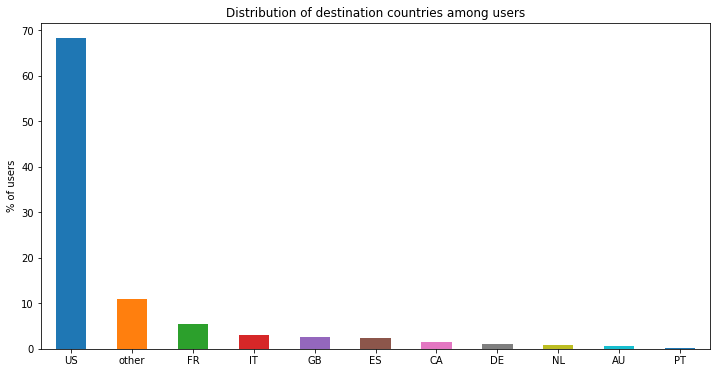

In [32]:
#visualizing the distribution of user's selection of country
plt.figure(figsize=(12,6))
destination_percentage=df_without_ndf.country_destination.value_counts()/df_without_ndf.shape[0]*100
destination_percentage.plot(kind='bar')
# sns.countplot(x='country_destination', data=df_without_ndf,order=df_without_ndf.country_destination.value_counts().index)
plt.ylabel("% of users")
plt.title("Distribution of destination countries among users")
plt.xticks(rotation='horizontal')
plt.show()

68% of the users here have mostly booked their Airbnb's in the US. This might be because all the users are from the US and prefer to go for vacation in the US only.

##### 2. What is the age distribution of users?

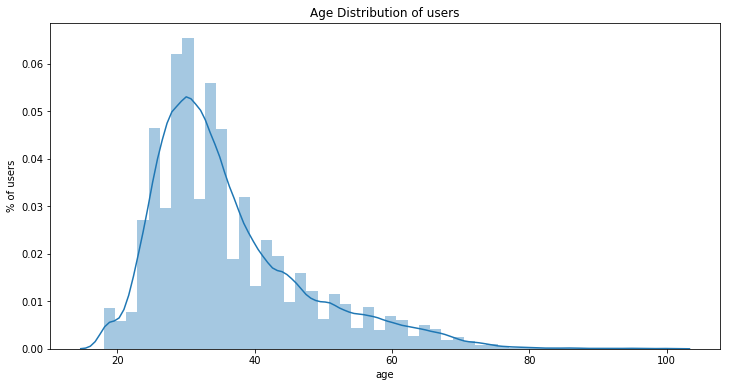

In [33]:
#Let's visualize the ages of users
plt.figure(figsize=(12,6))
sns.distplot(df_without_ndf.age.dropna())
plt.title("Age Distribution of users")
plt.ylabel('% of users')
plt.show()

Most of our users are in age range of 25-35 years.

##### 3. How does age varies with Destination countries?

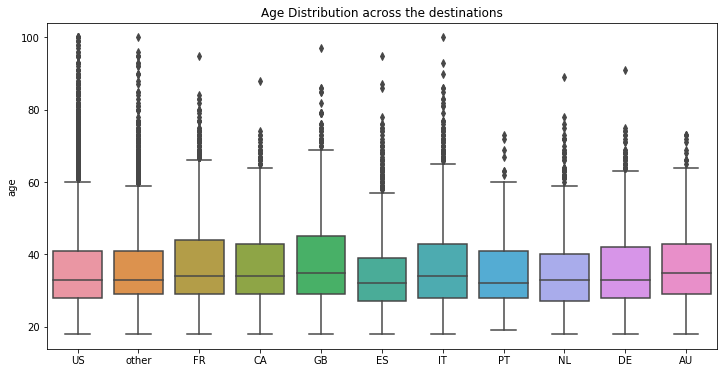

In [34]:
#Let's check how age is distributed across the destination countries
plt.figure(figsize=(12,6))
sns.boxplot(y='age' , x='country_destination',data=df_without_ndf)
plt.title("Age Distribution across the destinations")
plt.xlabel("")
plt.show()

Almost all the countries have a similar median age. Only users tavelling to Spain and Portugal are slightly younger. <br> Users of age 80 and above mostly choose US as their destination. The reason might be the US user data i.e. as all the users are from US, older people in US prefer not to travel outside their home country.

##### 4. What is the gender distribution of users?

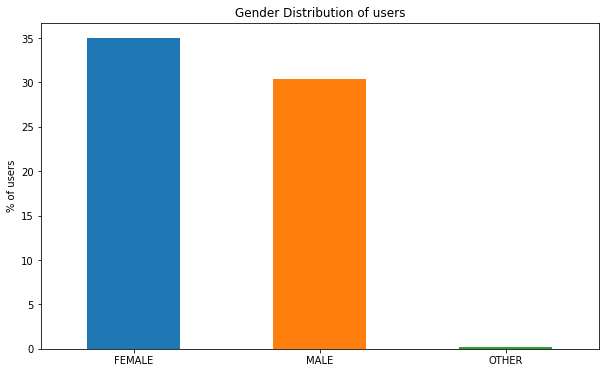

In [35]:
#gender distribution
plt.figure(figsize=(10,6))
gender_percentage=df_without_ndf.gender.value_counts()/df_without_ndf.shape[0]*100
gender_percentage.plot(kind='bar')
# sns.countplot(x='gender',data=df_without_ndf)
plt.ylabel("% of users")
plt.title("Gender Distribution of users")
plt.xticks(rotation='horizontal')
plt.show()

35% of the users are female and 30% of the users are male. It means that the difference between the gender of the users is not significant. Also, 34% of the gender information is missing from the dataset.

##### 5. How does Gender Distribution varies across the destination bookings?

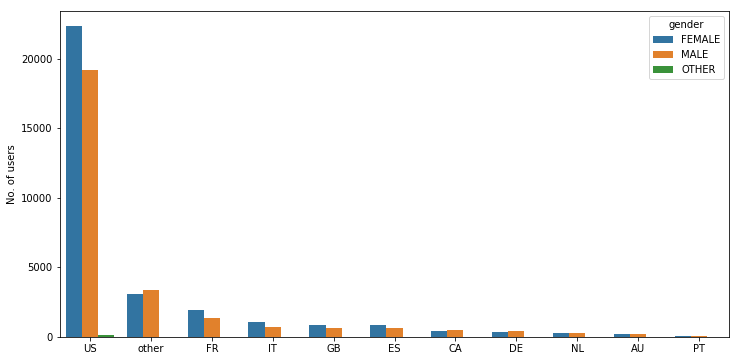

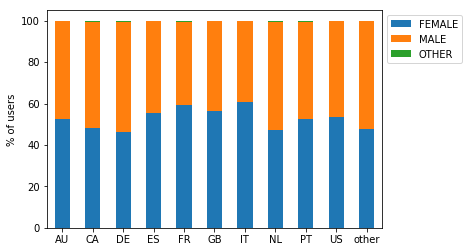

In [36]:
# fig,axes=plt.subplots(nrows=1,ncols=2, figsize=(12,4))

plt.figure(figsize=(12,6))
sns.countplot(x='country_destination',data=df_without_ndf, hue='gender', 
              order=df_without_ndf.country_destination.value_counts().index)
plt.xlabel('')
plt.ylabel('No. of users')

# plt.figure(figsize=(12,6))
ctab=pd.crosstab(df_without_ndf.country_destination,df_without_ndf['gender']).apply(lambda x: x/x.sum()*100, axis=1)
ctab.plot(kind='bar',stacked=True,legend=True)
plt.ylabel('% of users')
plt.xlabel('')
plt.xticks(rotation='horizontal')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

The bookings made by females are slightly higher for most of the destination countries except for Canada, Denmark, Netherlands and other(not mentioned) countries where booking by males are slightly more than the females.

##### 6. Which is the most popular signup Application among the users?

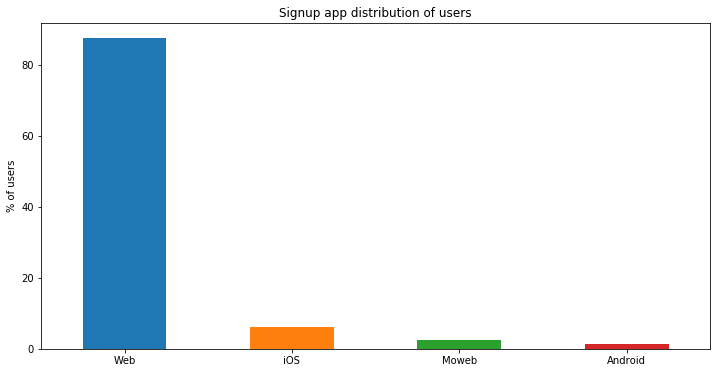

In [37]:
#User signup app distribution
plt.figure(figsize=(12,6))
signup_app_percentage=df_without_ndf.signup_app.value_counts()/df_without_ndf.shape[0]*100
signup_app_percentage.plot(kind='bar')
# sns.countplot(x='signup_app', data=df_without_ndf, order=df.signup_app.value_counts().index)
plt.title("Signup app distribution of users")
plt.ylabel('% of users')
plt.xticks(rotation='horizontal')
plt.show()

More than 80% of the users signup using Web, followed by iOS, Mobile Web and Android.

##### 7. Which signup Application is used by users to book their country destinations?

Note: For clear visualization of the data for countries other than US, I displayed both the charts: one with US and one excluding US. I'll follow this similarly for subsequent visualizations wherever required.

In [188]:
df_without_ndf_and_US=df_without_ndf[df_without_ndf.country_destination!='US']

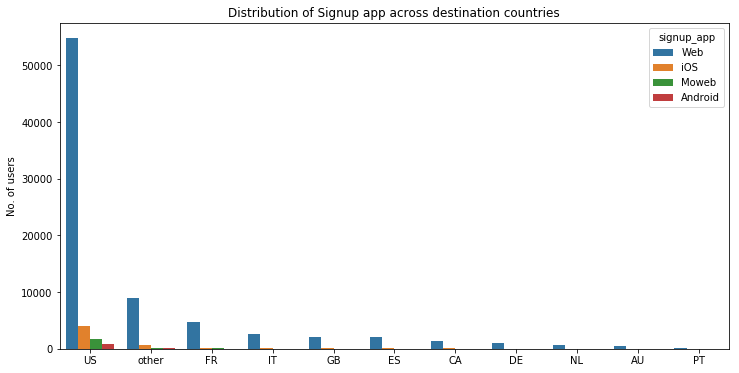

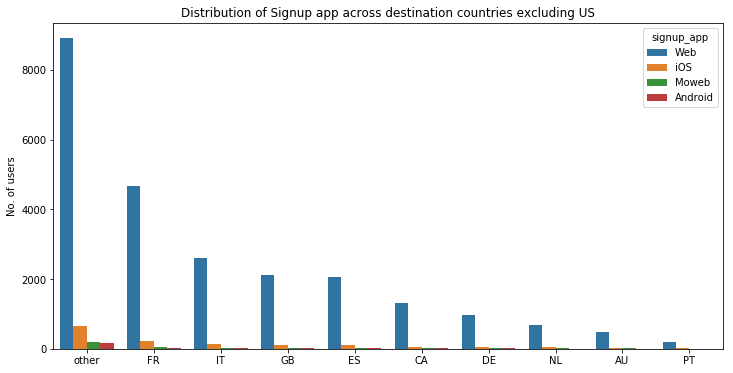

In [191]:
# fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination',data=df_without_ndf,hue='signup_app',
              order=df_without_ndf.country_destination.value_counts().index,
              hue_order=['Web', 'iOS', 'Moweb', 'Android'])
plt.title("Distribution of Signup app across destination countries")
plt.ylabel('No. of users')
plt.xlabel('')

plt.figure(figsize=(12,6))
sns.countplot(x='country_destination',data=df_without_ndf_and_US,hue='signup_app',
              order=df_without_ndf_and_US.country_destination.value_counts().index,
              hue_order=['Web', 'iOS', 'Moweb', 'Android'])
plt.title("Distribution of Signup app across destination countries excluding US")
plt.ylabel('No. of users')
plt.xlabel('')

plt.show()

We can see that users mostly use web irrespective of booking any of the destination countries.

##### 8. Which channel attracts more users to AirBnB?

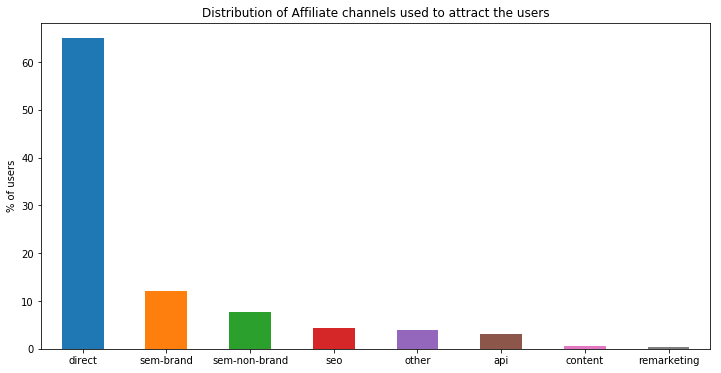

In [39]:
plt.figure(figsize=(12,6))
affiliate_channel_percentage=df_without_ndf.affiliate_channel.value_counts()/df_without_ndf.shape[0]*100
affiliate_channel_percentage.plot(kind='bar')
plt.title('Distribution of Affiliate channels used to attract the users')
plt.ylabel('% of users')
plt.xticks(rotation='horizontal')
# sns.countplot(x='affiliate_channel',data=df_without_ndf,order=df_without_ndf.affiliate_channel.value_counts().index)
plt.show()

Direct paid marketing is responsible for attracting 60% of the users to book a place using AirbnB.

##### 9. Which Affiliate channel attracts users to book places in their destination countries using Airbnb?

In [192]:
df_without_ndf.affiliate_channel.unique()

array(['direct', 'other', 'seo', 'sem-non-brand', 'content', nan,
       'sem-brand', 'remarketing', 'api'], dtype=object)

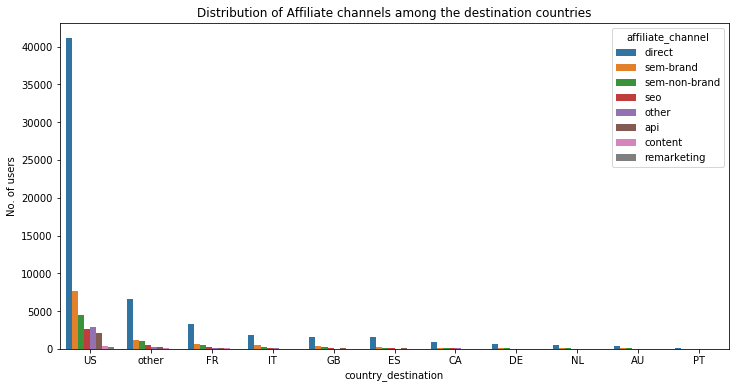

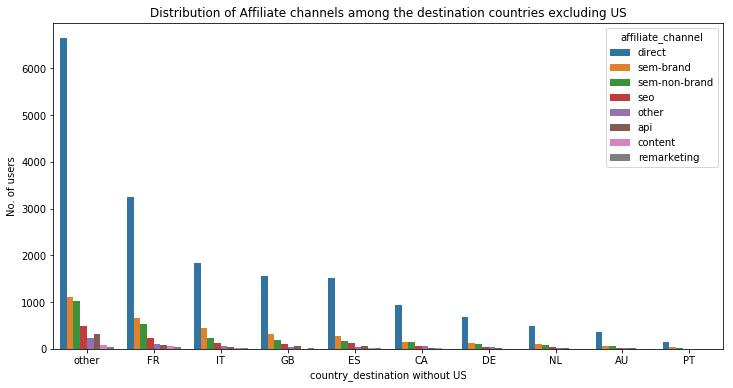

In [194]:
#Channel Distribution based on Destination countries
# fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,5))
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination',data=df_without_ndf,hue='affiliate_channel',
              order=df_without_ndf.country_destination.value_counts().index,
              hue_order=['direct', 'sem-brand', 'sem-non-brand', 'seo', 'other', 'api', 'content', 'remarketing'])
plt.title('Distribution of Affiliate channels among the destination countries')
plt.ylabel('No. of users')

plt.figure(figsize=(12,6))
sns.countplot(x='country_destination',data=df_without_ndf_and_US,hue='affiliate_channel',
              order=df_without_ndf_and_US.country_destination.value_counts().index,
              hue_order=['direct', 'sem-brand', 'sem-non-brand', 'seo', 'other', 'api', 'content', 'remarketing'])
plt.title('Distribution of Affiliate channels among the destination countries excluding US')
plt.xlabel('country_destination without US')
plt.ylabel('No. of users')

plt.show()

We can see that direct marketing is most popular for attracting users for booking places in their destination countries.

##### 10. Which signup method is used by users to register on Airbnb?

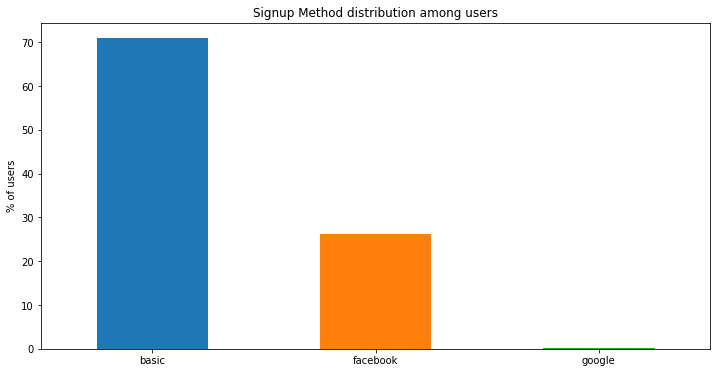

In [41]:
#Now lets check which apps are being used to signup
plt.figure(figsize=(12,6))
signup_method_percentage=df_without_ndf.signup_method.value_counts()/df_without_ndf.shape[0]*100
signup_method_percentage.plot(kind='bar')
plt.title("Signup Method distribution among users")
plt.ylabel('% of users')
plt.xticks(rotation='horizontal')
# sns.countplot(x='signup_method',data=df_without_ndf, order=df_without_ndf.signup_method.value_counts().index)
plt.show()

More than 70% of the users use the basic signup method to register themselves on Airbnb, followed by Facebook. Users rarely use their Google account to register on Airbnb.

##### 11. Which signup method is popular among users to register on Airbnb before booking their stay in the destination countries?

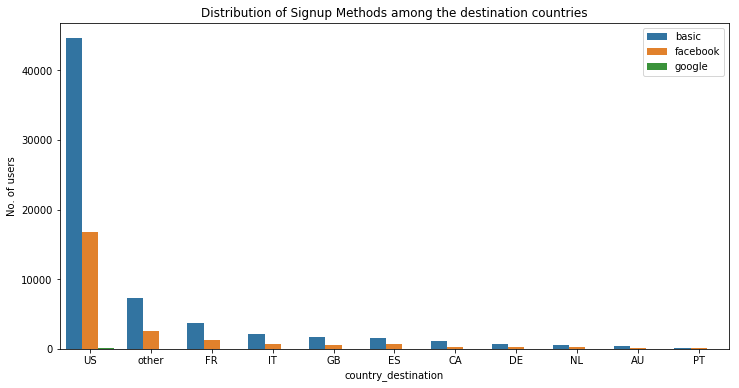

In [42]:
#Destination country based on signup app
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination',data=df_without_ndf, order=df_without_ndf.country_destination.value_counts().index,
             hue='signup_method', hue_order=['basic','facebook','google'])
plt.ylabel("No. of users")
plt.title("Distribution of Signup Methods among the destination countries")
plt.legend(loc='upper right')

plt.show()

Basic signup method is most common among users to signup into Airbnb to book any of the destination countries.

##### 12. Which is the first device used by users to access Airbnb?

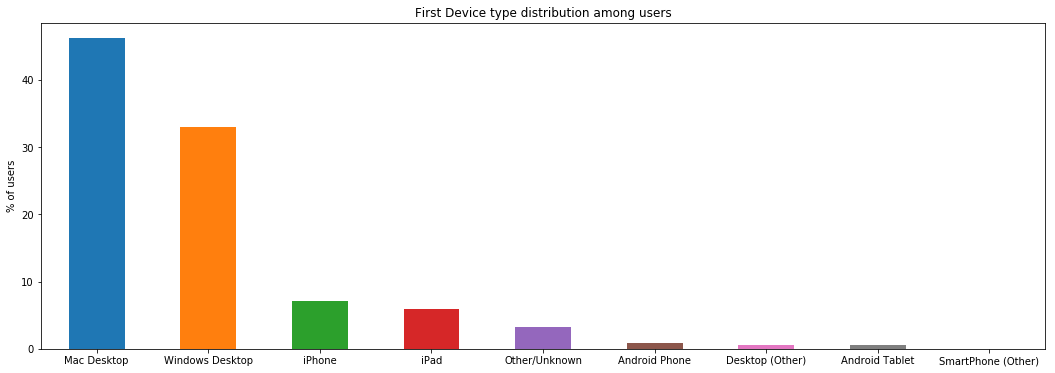

In [43]:
#First Device type distribution
plt.figure(figsize=(18,6))
first_device_type_percentage=df_without_ndf.first_device_type.value_counts()/df_without_ndf.shape[0]*100
first_device_type_percentage.plot(kind='bar')
# sns.countplot(x='first_device_type',data=df_without_ndf,order=df_without_ndf.first_device_type.value_counts().index)
plt.ylabel("% of users")
plt.title("First Device type distribution among users")
plt.xticks(rotation='horizontal')
plt.show()

More than 40% of the users use Mac Desktop to access Airbnb. Also, Mac Desktop and Windows Desktop together constitute appoximately 80% of all the users who use Desktop as the first device to access Airbnb. This supports our earlier result that stated "80% of users use Web as a signup app to register on Airbnb".

##### 13. Which device is used by the users first to book their destination countries?

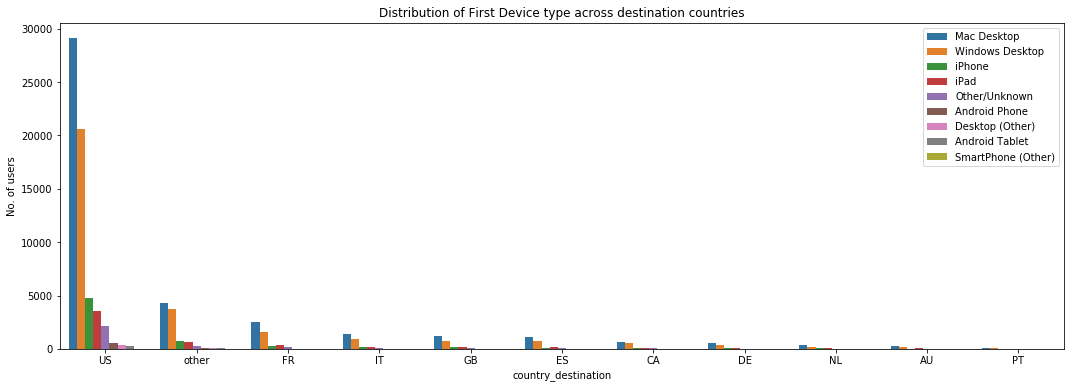

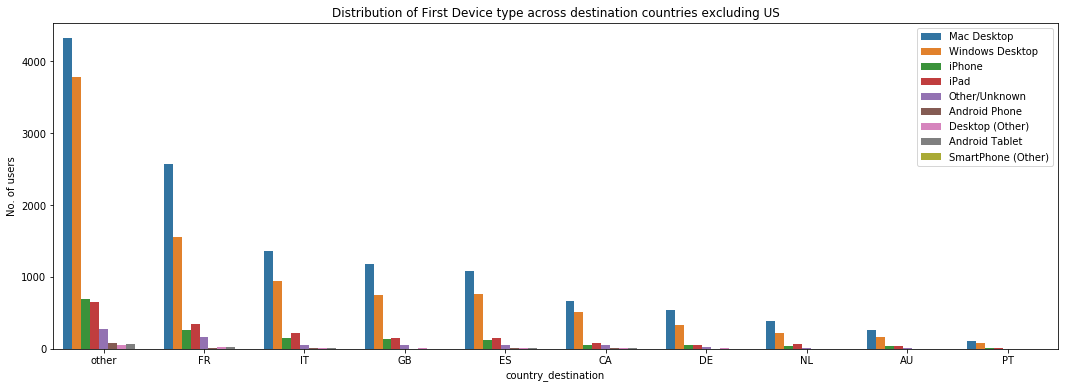

In [44]:
#First Device type distribition across destinations
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination',data=df_without_ndf, order=df_without_ndf.country_destination.value_counts().index,
             hue='first_device_type',hue_order=['Mac Desktop', 'Windows Desktop', 'iPhone', 'iPad', 'Other/Unknown', 
                                                'Android Phone','Desktop (Other)', 'Android Tablet', 'SmartPhone (Other)'])
plt.ylabel("No. of users")
plt.title('Distribution of First Device type across destination countries')
plt.legend(loc='upper right')

plt.figure(figsize=(18,6))
sns.countplot(x='country_destination',data=df_without_ndf_and_US, 
              order=df_without_ndf_and_US.country_destination.value_counts().index,
              hue='first_device_type', hue_order=['Mac Desktop', 'Windows Desktop', 'iPhone', 'iPad', 'Other/Unknown', 
                                                'Android Phone','Desktop (Other)', 'Android Tablet', 'SmartPhone (Other)'])
plt.ylabel("No. of users")
plt.title('Distribution of First Device type across destination countries excluding US')
plt.legend(loc='upper right')
plt.show()

Mac Desktop and Windows Desktop have been the most popular first devices used by users to access Airbnb.<br>

iPad is used more than iPhone as a first device by the users who book their places in countries apart from US and other (not mentioned) countries.

##### 14. Which is the most popular browser among users to access Airbnb?

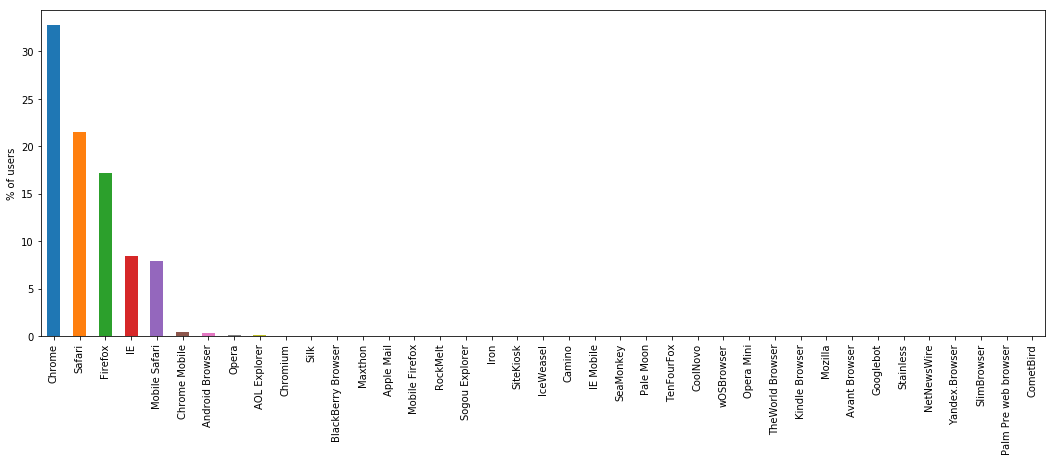

In [45]:
#First Browser distribution
plt.figure(figsize=(18,6))
first_browser_percentage=df_without_ndf.first_browser.value_counts()/df_without_ndf.shape[0]*100
first_browser_percentage.plot(kind='bar')
# sns.countplot(x='first_browser', data=df_without_ndf, order=df_without_ndf.first_browser.value_counts().index)
plt.ylabel("% of users")
plt.show()

35% of users use Chrome to access Airbnb, followed by Safari and Firefox. 

Earlier, we observed that Mac Desktop was used by most of our users, followed by Windows Desktop, iPhone and iPad. This means that Chrome is preferred over all other browsers on any device type, be it Apple devices or Windows Desktop.

##### 15. How many pages do users access before landing on Airbnb page?

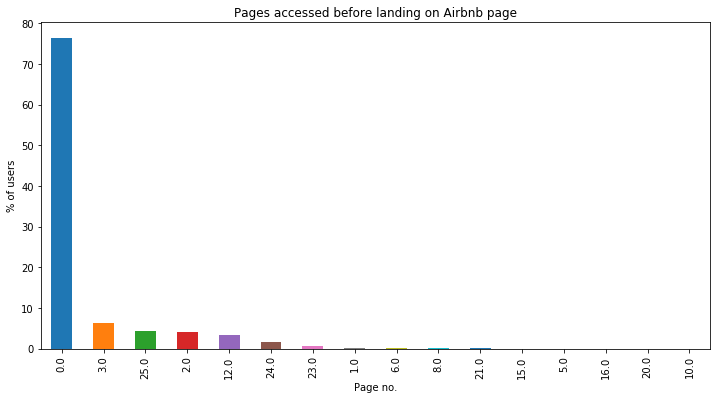

In [46]:
plt.figure(figsize=(12,6))
signup_flow_percentage=df_without_ndf.signup_flow.value_counts()/df_without_ndf.shape[0]*100
signup_flow_percentage.plot(kind='bar')
plt.title('Pages accessed before landing on Airbnb page')
plt.ylabel('% of users')
plt.xlabel('Page no.')
# sns.countplot(x='signup_flow',data=df_without_ndf)
plt.show()

We can see that more than 75% of the users land on Airbnb page directly.One interesting this to note is that there are around 5-6% of users who land on Airbnb page after accessing 25 pages. The reason for this might be that they start looking for options on other competitor websites first and then while searching, they might be popped up by an advertisement of airbnb somewhere with some attractive deals which makes them visit the Airbnb page.

##### 16. How has the customer base been expanding for Airbnb over time?

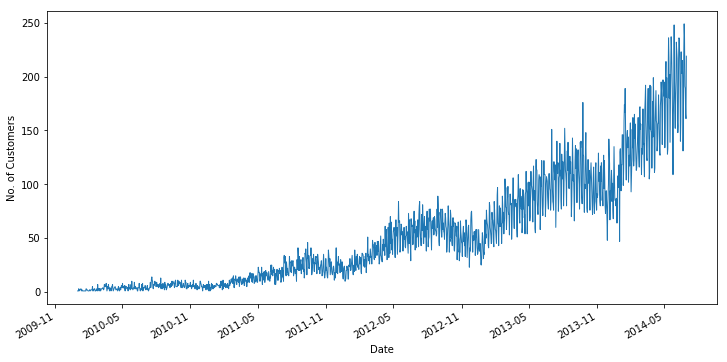

In [50]:
#New account created over time
plt.figure(figsize=(12,6))
(df_without_ndf.date_account_created.value_counts().plot(kind='line',linewidth=1))
plt.ylabel("No. of Customers")
plt.xlabel("Date")
plt.show()

There was a huge rise in user registration after 2014. This was the time when Airbnb's business started to boom and since then it has expanded at a very high rate.